# A quick example on how to deal with the data

This notebook serves as a little guidance on how to deal with the reduced brite data. Please look through this carefully, and take note of the comments.

# Features Todo
- ~~point to point scatter~~
- T, 1/T
- ~~Number of datapoints~~
- Time sampling
- ~~Noise~~

In [1]:
#this should always be your starting point on any notebook. Loads the data types
from common import *

/Users/marco/.brite


/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# using the load function, you can load a certain field from your hard drive. It returns a list
# of possible stars, which you can use
stars = load(10)
stars

[HD195068,
 HD200310,
 HD201433,
 HD194093,
 HD188892,
 HD202850,
 HD198478,
 HD203064,
 HD199629,
 HD194335,
 HD189687,
 HD195295,
 HD202109,
 HD202904,
 HD192685,
 HD198183,
 HD192640,
 HD198726,
 HD186882,
 HD202444,
 HD189178,
 HD198639,
 HD200120,
 HD195556,
 HD192577,
 HD193237,
 HD201078,
 HD199081,
 HD189849,
 HD197345,
 HD191610,
 HD197989]

In [3]:
#pick one of the stars you are interested in
star = stars[0]

In [4]:
#most stars will have a number of subfolders, with multiple reductions in them. Pick the one
#you like
star.results

['all']

In [5]:
#Feed the result you like into the get_data function which loads the data in the Data object
data = star.get_data(star.results[0])

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 88922 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2180 of "dubious year (Note 3)"
  ErfaWarning)


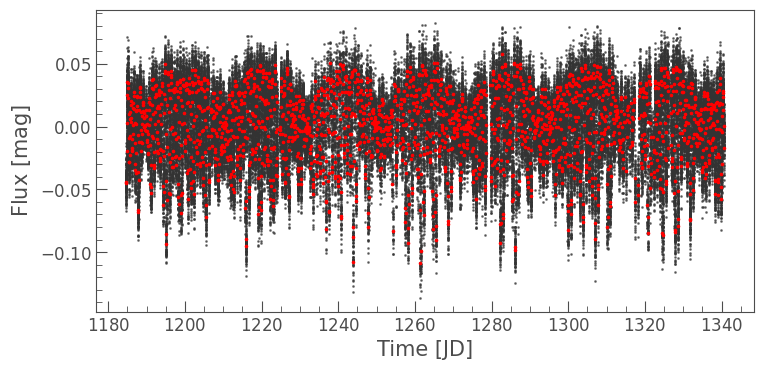

In [6]:
#Now you can plot the data :)
data.scatter()

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 9246 of "dubious year (Note 3)"
  ErfaWarning)


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

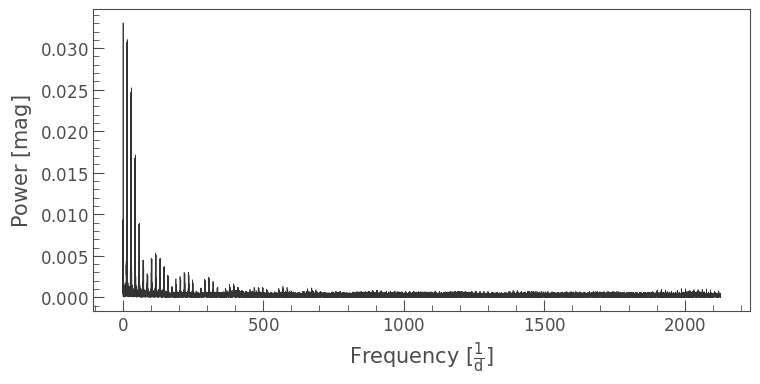

In [7]:
#You can also convert any given lightcurve into a periodogram
data.to_periodogram().plot()

In [8]:
#You can also easily find out some basic information about any given periodogram
# by using the show_properties function
data.to_periodogram().show_properties()


/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 9246 of "dubious year (Note 3)"
  ErfaWarning)


lightkurve.Periodogram properties:
      Attribute                   Description            Units
---------------------- --------------------------------- -----
                nterms                                 1      
          default_view                         frequency      
             ls_method                              fast      
frequency_at_max_power                             1.238 1 / d
             max_power                            0.0331   mag
               nyquist                         2127.6596 1 / d
   period_at_max_power                            0.8077     d
             frequency                   array (132329,) 1 / d
                period                   array (132329,)     d
                 power                   array (132329,)   mag
                 label                <class 'NoneType'>      
                  meta <class 'collections.OrderedDict'>      
              targetid                <class 'NoneType'>      


In [9]:
#You can also take a look at simbad for any given star
star.simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,OTYPE,SP_TYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,object,int32
* 43 Cyg,20 27 02.2677,+49 23 00.097,14,14,0.052,0.065,90,A,O,2018yCat.1345....0G,gammaDor,F0V:,1


In [28]:
#get the star type from simbad and spectral type
star.simbad['OTYPE'].value[0],star.simbad['SP_TYPE'].value[0]

('gammaDor', 'F0V:')

In [10]:
#Resulting RMS for a star
data.rms

0.02901475488307161

In [11]:
#Point-to-point scatter
data.ptp_scatter

0.01424506695368165

In [12]:
#Noise, as computed by the last n points for the periodogram
data.noise(100)

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 9246 of "dubious year (Note 3)"
  ErfaWarning)


<Quantity 0.00019921 mag>

In [13]:
#Number of datapoints for any given star
data.datapoints

9246

In [14]:
#You can also easily get the raw data (time,flux, flux_err)
data.raw_data

array([[1.18466339e+03, 1.18466363e+03, 1.18466386e+03, ...,
        1.19710140e+03, 1.19710163e+03, 1.19710234e+03],
       [5.62109000e+00, 5.64633000e+00, 5.62041000e+00, ...,
        5.68683000e+00, 5.68439000e+00, 5.70140000e+00],
       [1.04879490e-02, 1.04879490e-02, 1.04879490e-02, ...,
        1.02444160e-02, 1.02444160e-02, 1.02444160e-02],
       ...,
       [1.17500000e-03, 7.94000000e-04, 9.40000000e-04, ...,
        1.50500000e-03, 1.67700000e-03, 1.42000000e-03],
       [1.70000000e+02, 1.57000000e+02, 1.41000000e+02, ...,
        2.40000000e+01, 7.30000000e+01, 2.60000000e+01],
       [5.29415900e-01, 5.32859290e-01, 5.36302680e-01, ...,
        7.79943250e-01, 7.83401290e-01, 7.93731450e-01]])

In [15]:
data.path

'/Users/marco/Google Drive/Astroseismology/BRITE decorrelation summer 2021/Decorrelations/Field 10/RESULTS/HD195068/HD195068_10-Cyg-II-2015_BTr_1_3_A.ndat'

In [16]:
data

HD195068 -> HD195068_10-Cyg-II-2015_BTr_1_3_A.ndat

In [17]:
# You may also want to just create a data object from a path.
# For this you can access the configuration directly (recommended)

config_dict = get_config()
config_dict

{'Decorrelation Path': '/Users/marco/Google Drive/Astroseismology/BRITE decorrelation summer 2021'}

In [18]:
path = os.path.join(config_dict['Decorrelation Path'],'Decorrelations/Field 9/HD_143275/02-06-21_GD/RESULTS/HD143275_09-Sco-I-2015_BAb_2_3_A.ndat')
path

'/Users/marco/Google Drive/Astroseismology/BRITE decorrelation summer 2021/Decorrelations/Field 9/HD_143275/02-06-21_GD/RESULTS/HD143275_09-Sco-I-2015_BAb_2_3_A.ndat'

In [19]:
data = Data(path,None)

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1809 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 165 of "dubious year (Note 3)"
  ErfaWarning)


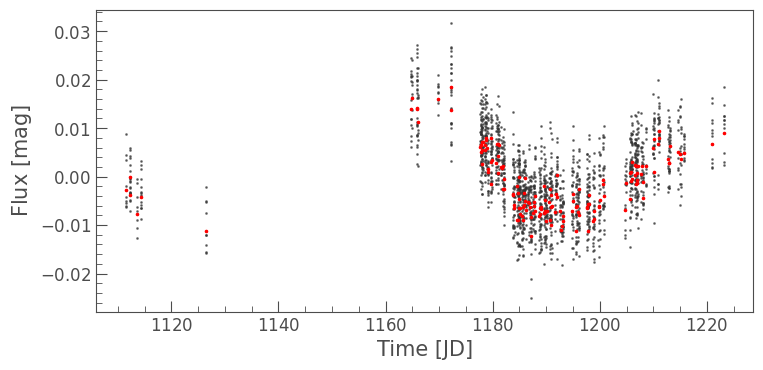

In [20]:
data.scatter()

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1809 of "dubious year (Note 3)"
  ErfaWarning)


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

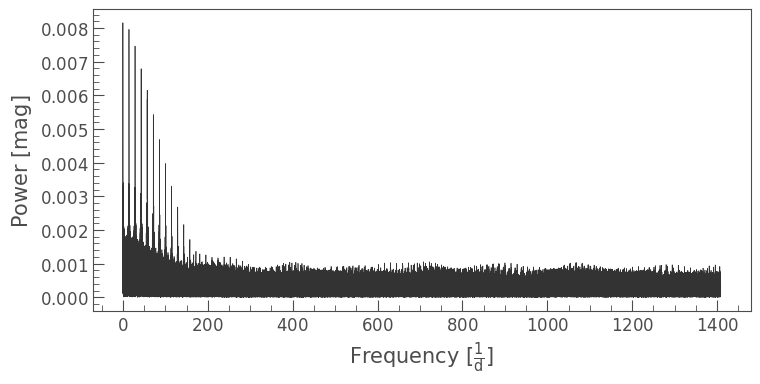

In [21]:
data.to_periodogram().plot()